<a href="https://colab.research.google.com/github/dhanujkumar/ICAT-Academy-Data-Science-and-Analytics-Programme-Assignments/blob/main/Assignment_on_Linear_Regression_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/car_age_price.csv')


In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.shape

(112, 2)

**Checking Null Values of the dataset**

In [5]:
data.isna().sum()

Year     0
Price    0
dtype: int64

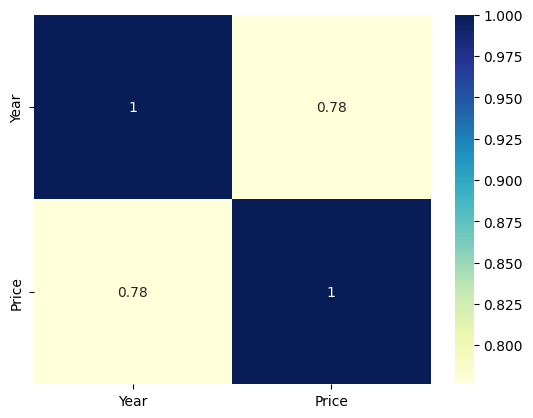

In [6]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot= True,cmap='YlGnBu')
plt.show()
     

In [7]:
x = data.drop(['Price'],axis=1) ##independent variable 
y = data['Price'] ##dependent variable or the target variable

In [8]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [9]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [10]:
#Scale the features - It's a good practice to scale the features to a similar range to avoid the dominance of certain features during the regression.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split ## import libraries 

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =42) ##splitting the data into training and testing data


In [13]:
# Fit the linear regression model
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
model=lin_regressor.fit(x_train,y_train)


In [14]:
# Predict the prices based on the model
predictions=model.predict(x_test)


In [15]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE = ', mean_squared_error(y_test,predictions))
print('R squared value = ',r2_score(y_test,predictions))

MSE =  4326906256.829671
R squared value =  0.36759313425902185


Visualization on test set 
      

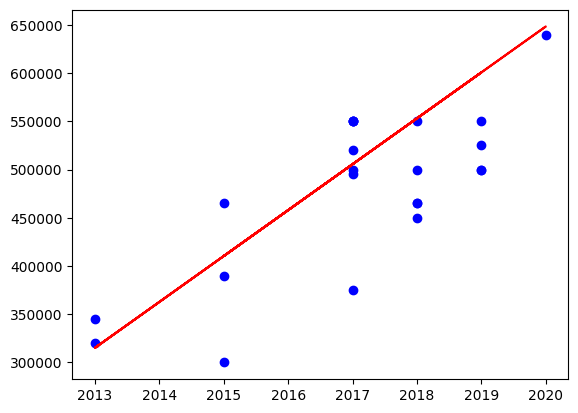

In [16]:
Y_pred = model.predict(x_test)

plt.scatter (x_test,y_test,color ='blue')
plt.plot(x_test,Y_pred,color ='red')
plt.show()
#Scattered data of Predicted Values

**From MSE,R squared value and the graph we plotted it's evident that our linear regression model isn't a good fit for the existing data.**

**Lasso Regression**

In [17]:
from sklearn.linear_model import Lasso

In [21]:
model_lasso =  Lasso(alpha =0.01)
model_lasso.fit(x_train,y_train)
pred_train_lasso = model_lasso.predict(x_train)
print('MSE for Lasso Regression training data:',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('R2 for Lasso REgression training data:',r2_score(y_train,pred_train_lasso))

pred_test_lasso = model_lasso.predict(x_test)
print('MSE for Lasso Regression testing Data:',np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print('R2 for Lasso Regression Testing Data:',r2_score(y_test,pred_test_lasso))
print('Model Score for Lasso Regression:',model_lasso.score(x_test,y_test))

MSE for Lasso Regression training data: 55743.0286777069
R2 for Lasso REgression training data: 0.6389354253755748
MSE for Lasso Regression testing Data: 65779.22006201117
R2 for Lasso Regression Testing Data: 0.3675932022019466
Model Score for Lasso Regression: 0.3675932022019466


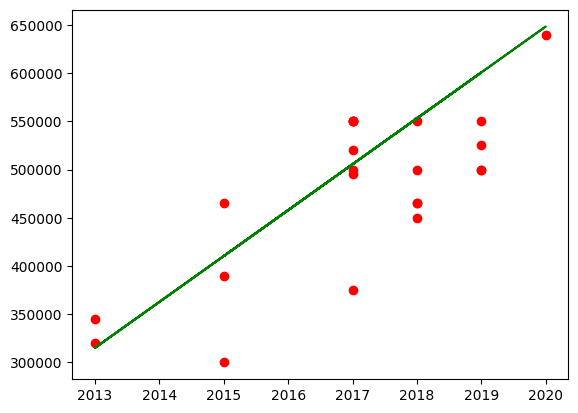

In [23]:
y_pred_lasso = model_lasso.predict(x_test)
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred_lasso, color='green')
plt.show()

From the MSE and R value itself it's clear that our model's accuracy is not upto the optimum level for the given dataset.

Predicting Price of a Car in 2022

In [24]:
target_year = [[2022]]
pred_year = model.predict(target_year)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
print('Predicted Possible Price of a 2022 model second-hand grand i10 is :',pred_year)

Predicted Possible Price of a 2022 model second-hand grand i10 is : [743601.61594504]


**Conclusion**

In this Dataset Both Linear Regression and Lasso Regression had shown low accuracy and our models were not fitting well to the existing data.